In [ ]:
# create by Mehrdad Pourfathi
# 9/17/2020

In [319]:
# import libraries
import numpy as np
import random
import matplotlib.pyplot as plt

In [326]:
def jarvis_march(p):
    ''' finds the convex hull of a set of points p using jarvis march
    '''
    # load an empty list:
    v = []
    # find the point with the lowest y:
    l = min(p, key=lambda x:x[1])
    p0 = l
    # add first point to list
    v.append(l)
    # select all other points 
    while True:
        # for now keep the last one
        if p0 != l:
            p.remove(l)
        q = p[0]
        for i in p[1:]:
            # make sure to skip the staritng poinug 
            if l == i:
                continue
            if direction(l,i,q) < 0:
                q = i        
            # if points are colinear pick longer segment
            elif direction(l,i,q) == 0:
                if distance(l,i) > distance(l,q):
                    q = i
        # if we got to the first point terminate loop
        if q == v[0]:
            return v
        v.append(q)
        l = q


def direction(l,i,q):
    ''' finds if liq sequence of points turns left or right 
        if d>0 it turns left otherwise turns right.
    '''
    return (i[0]-l[0])*(q[1]-l[1]) - (q[0]-l[0])*(i[1]-l[1])


def distance(l,i):
    ''' given two points (l and i) provide vector lenght
    '''
    return np.sqrt((l[0]-i[0])**2 + (l[1]-i[1])**2)

In [327]:
# generate data
random.seed(6)
NPOINTS = 100
NRANGE = 1000
pts = [[random.randrange(0,NRANGE),random.randrange(0,NRANGE)] for i in range(NPOINTS)]

In [330]:
v = jarvis_march(pts.copy())
print(f'number of vertices : {len(v)}')

number of vertices : 14


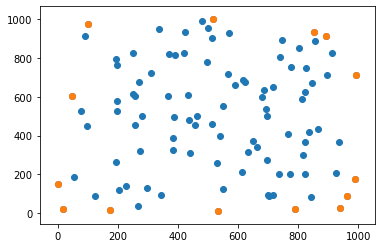

In [329]:
plt.scatter(np.array(pts)[:,0],np.array(pts)[:,1])
plt.scatter(np.array(v)[:,0],np.array(v)[:,1])
plt.show()